In [88]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
from sklearn.linear_model import Ridge

server = 'analityk.wwsi.edu.pl,50221' 
database = 'PandemiaCov19' 
username = 'student' 
password = 'ciekawski'  
cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()

query = "SELECT [ID_Country],[total_cases] FROM [PandemiaCov19].[dbo].[Cases];"
df = pd.read_sql(query, cnxn)
query2 = "SELECT [ID_Country],[continent],[location],[population],[median_age],[gdp_per_capita] FROM [PandemiaCov19].[dbo].[Dim_country];"
df2 = pd.read_sql(query2, cnxn)
query3 = "SELECT [ID_Country],[total_deaths] FROM [PandemiaCov19].[dbo].[Deaths];"
df3 = pd.read_sql(query3, cnxn)
query4 = "SELECT [ID_Country],[total_tests] FROM [PandemiaCov19].[dbo].[Tests];"
df4 = pd.read_sql(query4, cnxn)


tests = df4
df3.dropna()


przypadki = df
przypadki.dropna(how='any', inplace=True)

kraje = df2
kraje.dropna(how='any', inplace=True)
 
kraje.head(10)


calosc = pd.merge(przypadki, kraje, on="ID_Country")

fix = calosc.sort_values('total_cases', ascending=False).drop_duplicates('location').sort_index()


nazwy = ['Asia', 'Africa', 'South America', 'Oceania', 'North America']
kraje = ['United States', 'Canada','Mexico','Poland','Lithuania','Austria','South Korea', 'Turkey','Sri Lanka','Egypt','South Africa','Brazil','Argentina','Chile','Australia','Fiji','New Zealand']


fix['PercPopCases'] = (fix['total_cases'] / fix['population']) *100
fix = fix.round(decimals = 1)

fix.head(10)

,ID_Country,total_cases,continent,location,population,median_age,gdp_per_capita,PercPopCases
1108,3,207900,Asia,Afghanistan,38928341.0,18.6,1804.0,0.5
2200,6,334037,Europe,Albania,2877800.0,38.0,11803.4,11.6
3312,57,271287,Africa,Algeria,43851043.0,29.1,13913.8,0.6
4384,4,105095,Africa,Angola,32866268.0,16.8,5819.5,0.3
5442,11,9106,North America,Antigua and Barbuda,97928.0,32.1,21490.9,9.3
6596,9,10004679,South America,Argentina,45195777.0,31.9,18933.9,22.1
7709,10,445976,Asia,Armenia,2963234.0,35.7,8787.6,15.1
8652,2,44145,North America,Aruba,106766.0,41.2,35973.8,41.3
9862,12,11247412,Oceania,Australia,25499881.0,37.9,44648.7,44.1
10976,13,5742055,Europe,Austria,9006400.0,44.4,45436.7,63.8


In [89]:
### BLEDNE DANE DOTYCZACE PONIZSZEGO WIERSZU
##146 	8588722 	Europe 	Netherlands 	17134873.0 	43.2 	48472.5 	50.1 	832998 	9.7 	2471194 	0.1
##final1 = final.replace([832998],[22990])
### WPROWADZENIE POPRAWNYCH DANYCH ^^


deaths1 = df3.sort_values('total_deaths', ascending=False).drop_duplicates('ID_Country').sort_index()
tests.dropna()
tests = tests.sort_values('total_tests', ascending=False).drop_duplicates('ID_Country').sort_index()
final = pd.merge(fix, deaths1, on="ID_Country")
final = final.replace([832998],[22990])
final = pd.merge(final, tests, on = "ID_Country")



final['PercCasesDeaths'] = (final['total_deaths'] / final['total_cases']) * 100

final['TestPerPerson'] = (final['total_tests'] / final['population'])
final = final.round(decimals = 1)

final.head(10)

,ID_Country,total_cases,continent,location,population,median_age,gdp_per_capita,PercPopCases,total_deaths,total_tests,PercCasesDeaths,TestPerPerson
0,3,207900,Asia,Afghanistan,38928341.0,18.6,1804.0,0.5,7854,994894,3.8,0.0
1,6,334037,Europe,Albania,2877800.0,38.0,11803.4,11.6,3596,1606907,1.1,0.6
2,57,271287,Africa,Algeria,43851043.0,29.1,13913.8,0.6,6881,0,2.5,0.0
3,4,105095,Africa,Angola,32866268.0,16.8,5819.5,0.3,1930,1495572,1.8,0.0
4,11,9106,North America,Antigua and Barbuda,97928.0,32.1,21490.9,9.3,146,16700,1.6,0.2
5,9,10004679,South America,Argentina,45195777.0,31.9,18933.9,22.1,130249,35628536,1.3,0.8
6,10,445976,Asia,Armenia,2963234.0,35.7,8787.6,15.1,8716,3079375,2.0,1.0
7,2,44145,North America,Aruba,106766.0,41.2,35973.8,41.3,281,0,0.6,0.0
8,12,11247412,Oceania,Australia,25499881.0,37.9,44648.7,44.1,17712,73231296,0.2,2.9
9,13,5742055,Europe,Austria,9006400.0,44.4,45436.7,63.8,21564,189791719,0.4,21.1


In [113]:
gdp = final
final.head()
###gdp.head(10)

##finalgdp = gdp[~gdp['continent'].isin(nazwy)]
##finalgdp = finalgdp.sort_values('gdp_per_capita', ascending=False)

##finalgdp.head(10)



,ID_Country,total_cases,location,population,median_age,gdp_per_capita,PercPopCases,total_deaths,total_tests,PercCasesDeaths,TestPerPerson
continent,,,,,,,,,,,
Asia,3,207900,Afghanistan,38928341.0,18.6,1804.0,0.5,7854,994894,3.8,0.0
Europe,6,334037,Albania,2877800.0,38.0,11803.4,11.6,3596,1606907,1.1,0.6
Africa,57,271287,Algeria,43851043.0,29.1,13913.8,0.6,6881,0,2.5,0.0
Africa,4,105095,Angola,32866268.0,16.8,5819.5,0.3,1930,1495572,1.8,0.0
North America,11,9106,Antigua and Barbuda,97928.0,32.1,21490.9,9.3,146,16700,1.6,0.2


Text(0.5, 1.0, 'GDP influence over number of confirmed cases')

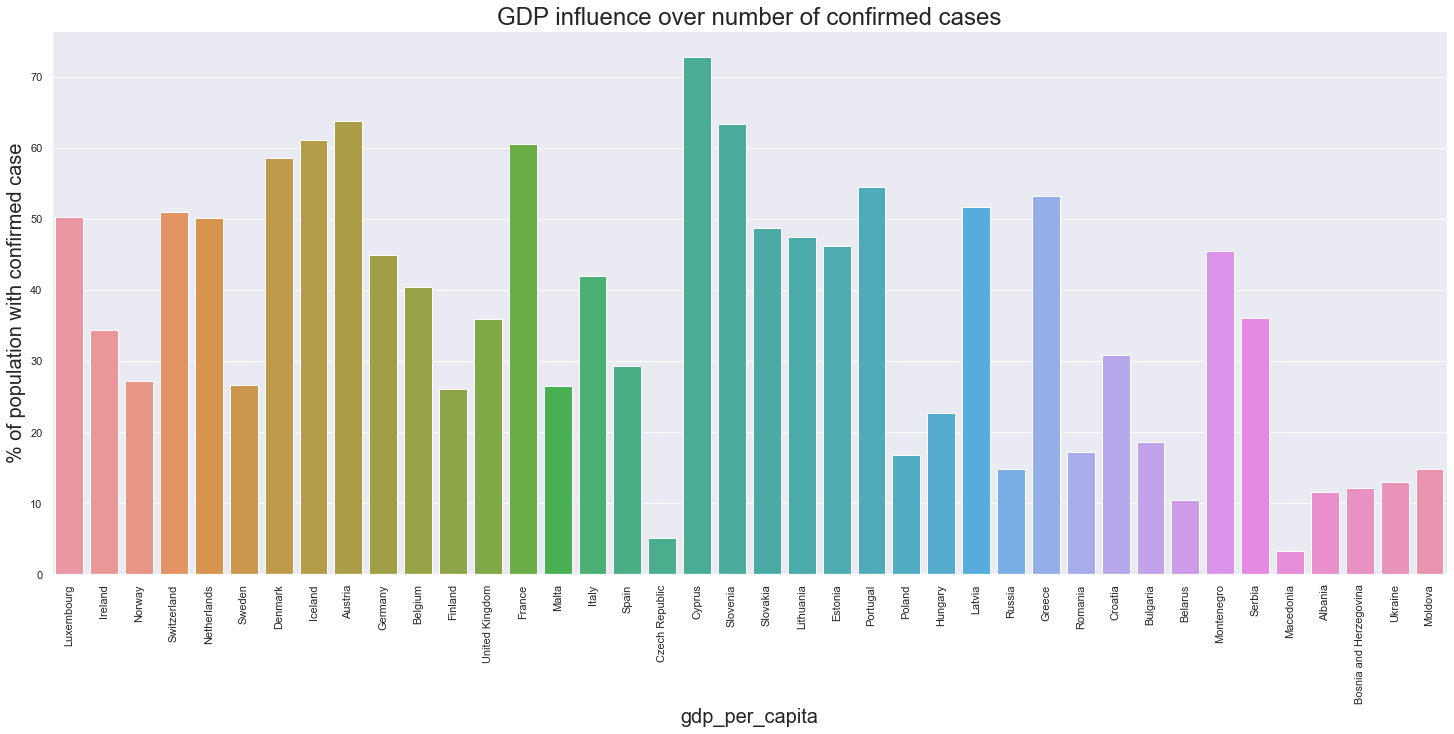

In [46]:


sns.set_theme(style='dark')
sns.set(font_scale=10)
sns.set(rc={'figure.figsize':(25,10)})
ax = sns.barplot(x = "location", y = 'PercPopCases', data = gdp)
plt.xticks(rotation=90)


plt.xlabel('gdp_per_capita', fontsize=20);
plt.ylabel('% of population with confirmed case', fontsize=20);
plt.title('GDP influence over number of confirmed cases', fontsize=24)



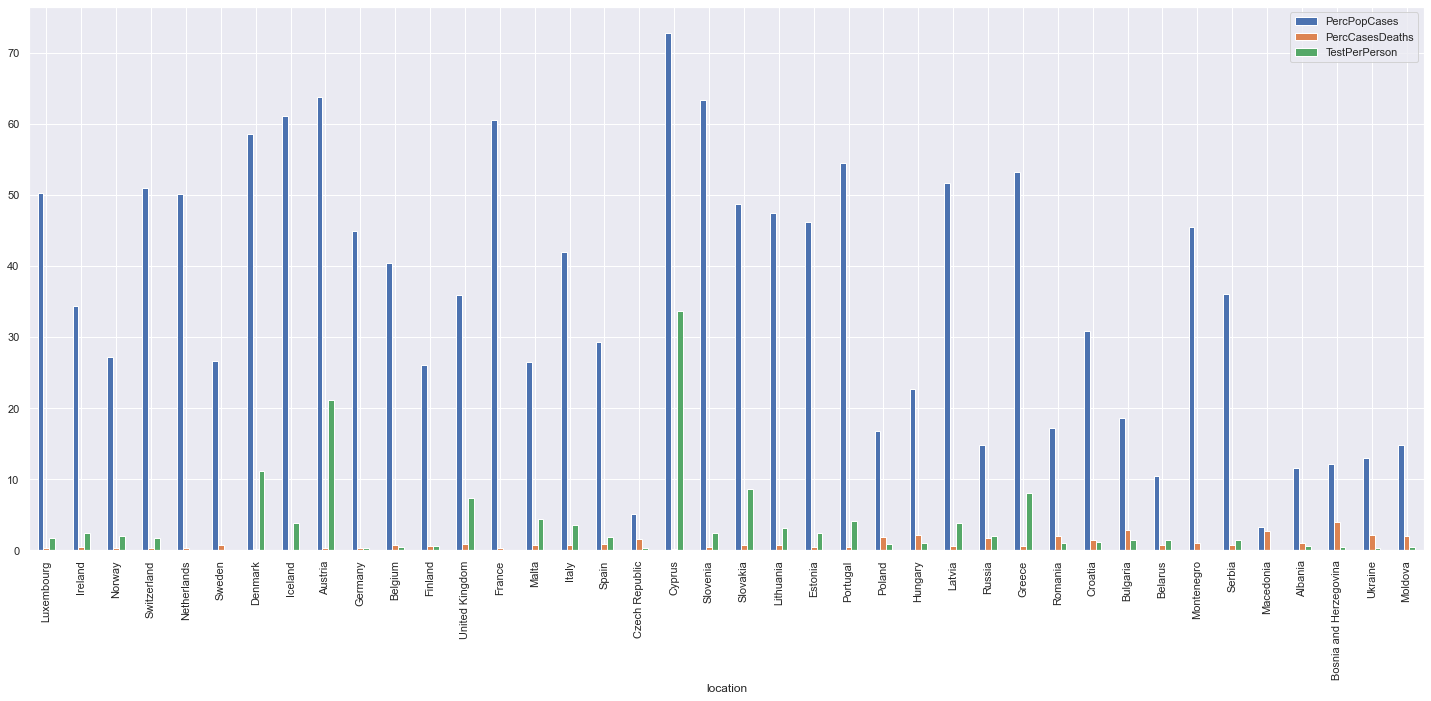

In [47]:
gdp.plot(x="location", y=["PercPopCases", "PercCasesDeaths","TestPerPerson"], kind="bar")

plt.show()


In [87]:
Kontynenty = final

,ID_Country,total_cases,continent,location,population,median_age,gdp_per_capita,PercPopCases,total_deaths,total_tests,PercCasesDeaths,TestPerPerson
0,6,334029,Europe,Albania,2877800.0,38.0,11803.4,11.6,3596,1606907,1.076553,0.558380
1,13,5740581,Europe,Austria,9006400.0,44.4,45436.7,63.7,21564,189791719,0.375641,21.072984
2,25,994037,Europe,Belarus,9449321.0,40.3,17168.0,10.5,7118,13180098,0.716070,1.394820
3,16,4686147,Europe,Belgium,11589616.0,41.8,42658.6,40.4,33478,5869461,0.714404,0.506441
4,24,401187,Europe,Bosnia and Herzegovina,3280815.0,42.5,11713.9,12.2,16241,1483234,4.048237,0.452093
5,21,1294116,Europe,Bulgaria,6948445.0,44.7,18563.3,18.6,38138,9926953,2.947031,1.428658
6,88,1266405,Europe,Croatia,4105268.0,44.0,22669.8,30.8,17759,4922712,1.402316,1.199121
8,51,551070,Europe,Czech Republic,10708982.0,43.3,32605.9,5.1,9036,3242280,1.639719,0.302763
9,55,3396658,Europe,Denmark,5792203.0,42.3,46682.5,58.6,7982,64429079,0.234996,11.123415
11,65,1448656,Europe,Finland,5540718.0,42.8,40585.7,26.1,8431,3290497,0.581988,0.593876
